In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("sydney_rain prediction.xlsx",header=0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [6]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.770893,0.012883,0.571257,-0.063154,0.052490,0.271686,-0.393827,-0.356406,0.260508,0.180094,0.939116,0.752922
MaxTemp,0.770893,1.000000,-0.140107,0.513138,0.326683,-0.187437,-0.152615,-0.389088,-0.425169,-0.095859,-0.108426,0.859346,0.960457
Rainfall,0.012883,-0.140107,1.000000,-0.126143,-0.308044,0.331045,0.301681,-0.037051,0.003216,0.277427,0.229576,-0.056061,-0.143698
Evaporation,0.571257,0.513138,-0.126143,1.000000,0.177628,-0.399019,-0.103246,-0.349421,-0.303330,-0.041160,-0.041205,0.608872,0.477629
Sunshine,-0.063154,0.326683,-0.308044,0.177628,1.000000,-0.490967,-0.585736,-0.046654,-0.094841,-0.734302,-0.751838,0.115135,0.345139
Humidity9am,0.052490,-0.187437,0.331045,-0.399019,-0.490967,1.000000,0.659194,0.263977,0.252360,0.459455,0.359910,-0.148239,-0.157598
Humidity3pm,0.271686,-0.152615,0.301681,-0.103246,-0.585736,0.659194,1.000000,0.154908,0.183647,0.498119,0.517755,0.128818,-0.214047
Pressure9am,-0.393827,-0.389088,-0.037051,-0.349421,-0.046654,0.263977,0.154908,1.000000,0.963173,-0.012196,-0.044233,-0.419440,-0.346731
Pressure3pm,-0.356406,-0.425169,0.003216,-0.303330,-0.094841,0.252360,0.183647,0.963173,1.000000,0.020884,-0.003187,-0.405047,-0.392653
Cloud9am,0.260508,-0.095859,0.277427,-0.041160,-0.734302,0.459455,0.498119,-0.012196,0.020884,1.000000,0.609556,0.097135,-0.098202


In [7]:
print(df.isnull().sum())

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


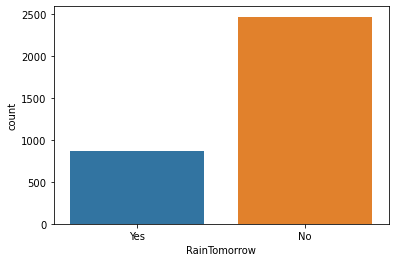

In [8]:
sns.countplot(df['RainTomorrow'])
plt.show()

In [9]:
df = df.drop(['Date', 'Location'], axis=1)

In [10]:
df.head(15)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
5,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
6,18.6,26.3,6.2,5.2,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes
7,17.2,22.3,27.6,5.8,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
8,16.4,20.8,12.6,4.8,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,Yes
9,14.6,24.2,8.8,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,No


In [11]:
print(df.isnull().sum())

MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64


In [12]:
df['MinTemp'].mean()

14.865056988602275

In [13]:
df['MinTemp'].fillna(value = df['MinTemp'].mean(), inplace = True)

In [14]:
df['MaxTemp'].mean()

23.002338830584726

In [15]:
df['MaxTemp'].fillna(value = df['MaxTemp'].mean(), inplace = True)

In [16]:
df['Rainfall'].mean()

3.3302311618132627

In [17]:
df['Rainfall'].fillna(value = df['Rainfall'].mean(), inplace = True)

In [18]:
df['Evaporation'].mean()

5.18743152769325

In [19]:
df['Evaporation'].fillna(value = df['Evaporation'].mean(), inplace = True)

In [20]:
df['Sunshine'].mean()

7.179373682625727

In [21]:
df['Sunshine'].fillna(value = df['Sunshine'].mean(), inplace = True)

In [22]:
df['Humidity9am'].mean()

68.22900993078544

In [23]:
df['Humidity9am'].fillna(value = df['Humidity9am'].mean(), inplace = True)

In [24]:
df['Humidity3pm'].mean()

54.69915764139591

In [25]:
df['Humidity3pm'].fillna(value = df['Humidity3pm'].mean(), inplace = True)

In [26]:
df['Pressure9am'].mean()

1018.3461561652084

In [27]:
df['Pressure9am'].fillna(value = df['Pressure9am'].mean(), inplace = True)

In [28]:
df['Pressure3pm'].mean()

1016.0187739602158

In [29]:
df['Pressure3pm'].fillna(value = df['Pressure3pm'].mean(), inplace = True)

In [30]:
df['Cloud9am'].mean()

4.181522915914832

In [31]:
df['Cloud9am'].fillna(value = df['Cloud9am'].mean(), inplace = True)

In [32]:
df['Cloud3pm'].mean()

4.218659942363113

In [33]:
df['Cloud3pm'].fillna(value = df['Cloud3pm'].mean(), inplace = True)

In [34]:
df['Temp9am'].mean()

17.81974197419742

In [35]:
df['Temp9am'].fillna(value = df['Temp9am'].mean(), inplace = True)

In [36]:
df['Temp3pm'].mean()

21.53333333333329

In [37]:
df['Temp3pm'].fillna(value = df['Temp3pm'].mean(), inplace = True)

In [38]:
df['RainToday'].mode()

0    No
Name: RainToday, dtype: object

In [39]:
df['RainToday'].loc[df[pd.isna(df['RainToday'])].index]=list(df['RainToday'].mode())[0]
set(df['RainToday'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_14324\2424058427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'].loc[df[pd.isna(df['RainToday'])].index]=list(df['RainToday'].mode())[0]


{'No', 'Yes'}

In [40]:
df.shape

(3337, 15)

In [41]:
#ga=df.dropna()

In [42]:
#print(ga)

In [43]:
#3375-2677

In [44]:
print(df.isnull().sum())

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64


In [45]:
set(df.RainToday)

{'No', 'Yes'}

In [46]:
df = pd.get_dummies(df,columns = ["RainToday","RainTomorrow"],drop_first = True)

In [47]:
df.head(15)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
5,20.2,27.2,1.6,2.600000,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1,1
6,18.6,26.3,6.2,5.200000,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,1,1
7,17.2,22.3,27.6,5.800000,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,1,1
8,16.4,20.8,12.6,4.800000,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,1,1
9,14.6,24.2,8.8,4.400000,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,1,0


In [48]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770701,0.012866,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.018690,0.079962
MaxTemp,0.770701,1.000000,-0.139837,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.188334,-0.149269
Rainfall,0.012866,-0.139837,1.000000,-0.100468,-0.306119,0.330469,0.301337,-0.036988,0.003210,0.242049,0.200732,-0.055974,-0.143491,0.555015,0.293808
Evaporation,0.567623,0.509060,-0.100468,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879,-0.228791,-0.064301
Sunshine,-0.062959,0.325107,-0.306119,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.367080,-0.521637
Humidity9am,0.052362,-0.186875,0.330469,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.400603,0.329011
Humidity3pm,0.270944,-0.152310,0.301337,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.342936,0.471250
Pressure9am,-0.393024,-0.388533,-0.036988,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.000113,-0.032465
Pressure3pm,-0.355764,-0.424653,0.003210,-0.300285,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.056978,0.010977
Cloud9am,0.236288,-0.087381,0.242049,-0.037598,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.316502,0.329525


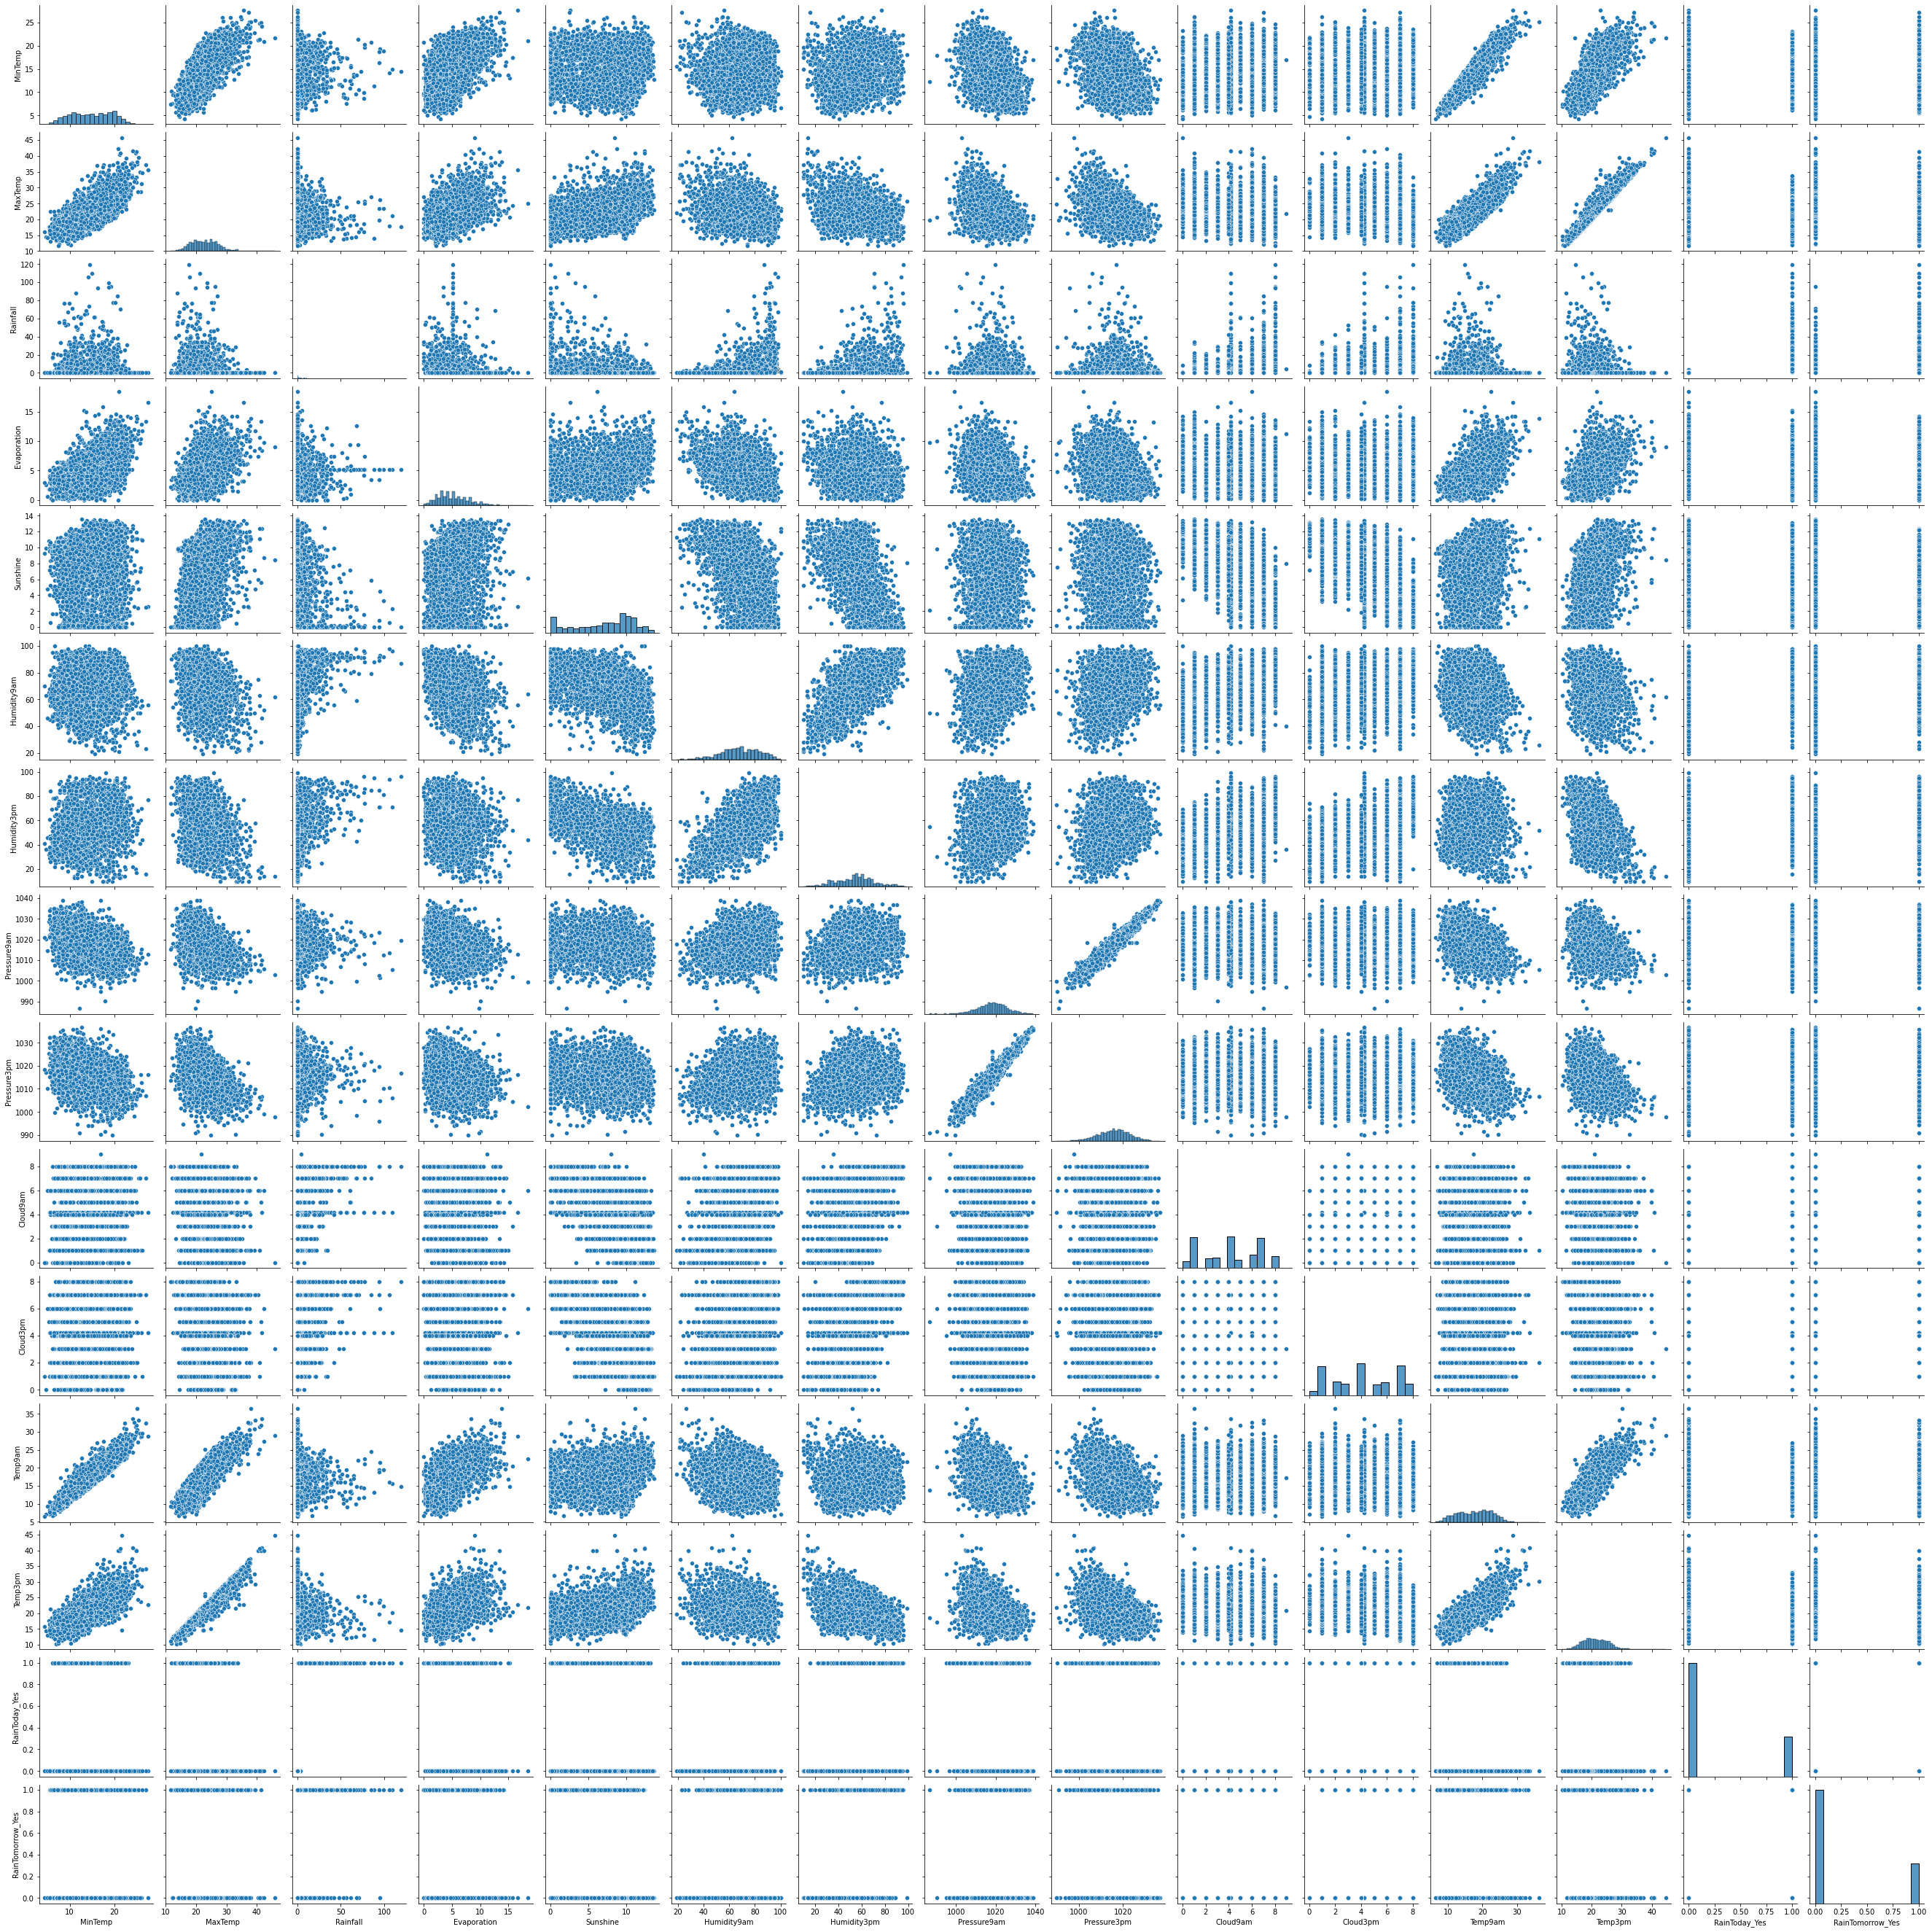

In [49]:
sns.pairplot(df) # Visualisation of the relation between diffrent variables given in the dataset
plt.show()

In [50]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


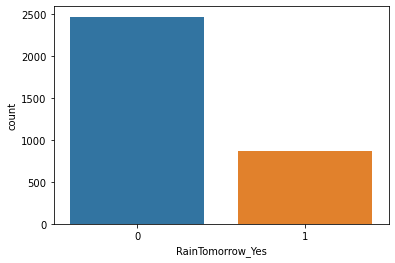

In [51]:
sns.countplot(df['RainTomorrow_Yes'])
plt.show()

### Splitting the Training and Testing Data

In [52]:
from sklearn.model_selection import train_test_split
import math

In [53]:
X = df.drop('RainTomorrow_Yes', axis = 1)

In [54]:
y = df['RainTomorrow_Yes']

In [55]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0


In [56]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3332    0
3333    0
3334    0
3335    0
3336    0
Name: RainTomorrow_Yes, Length: 3337, dtype: uint8

In [57]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [58]:
X_train.shape

(2669, 14)

In [59]:
X_test.shape

(668, 14)

### 1. Decision_Tree_classifier

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn import tree
classtree = tree.DecisionTreeClassifier(max_depth = 3)
classtree.fit(X_train, y_train)
y_pred=classtree.predict(X_test)

In [61]:
r2_score(y_test, y_pred)

-0.04452717795979155

In [62]:
roc_auc_score(y_test, y_pred)

0.7170265574584264

In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[457  53]
 [ 73  85]]


In [64]:
accuracy_score(y_test, y_pred)

0.811377245508982

### 2.Bagging_Classifier

In [65]:
from sklearn import tree
classtree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier

In [66]:
bag_class = BaggingClassifier(base_estimator=classtree, n_estimators=1000,bootstrap=True, n_jobs=-1,random_state=42)

In [67]:
bag_class.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [68]:
y_bagpred = bag_class.predict(X_test)

In [78]:
r2_score(y_test, y_bagpred)

0.03837180441796961

In [79]:
roc_auc_score(y_test, y_bagpred)

0.7246463142218913

In [69]:
confusion_matrix(y_test, y_bagpred)

array([[468,  42],
       [ 74,  84]], dtype=int64)

In [70]:
accuracy_score(y_test,y_bagpred)

0.8263473053892215

### 3. Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
RF_class = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [72]:
RF_class.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [73]:
y_RFpred = RF_class.predict(X_test)

In [75]:
r2_score(y_test, y_RFpred)

0.12127078679573078

In [76]:
roc_auc_score(y_test, y_RFpred)

0.727897741375031

In [74]:
confusion_matrix(y_test, y_RFpred)

array([[481,  29],
       [ 77,  81]], dtype=int64)

In [77]:
accuracy_score(y_test,y_RFpred)

0.8413173652694611

### 4. Grid Search

In [80]:
from sklearn.model_selection import GridSearchCV
RF_class = RandomForestClassifier(n_estimators=250,random_state=42)

In [81]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [82]:
grid_search = GridSearchCV(RF_class, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [84]:
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 10}

In [85]:
cvRF_class = grid_search.best_estimator_

In [86]:
y_cvRFpred = cvRF_class.predict(X_test)

In [89]:
roc_auc_score(y_test, y_cvRFpred)

0.7178704393149665

In [88]:
confusion_matrix(y_test, y_cvRFpred)

array([[474,  36],
       [ 78,  80]], dtype=int64)

In [87]:
accuracy_score(y_test,y_cvRFpred )

0.8293413173652695

### 5. Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
garbst_class = GradientBoostingClassifier()
garbst_class.fit(X_train, y_train)

GradientBoostingClassifier()

In [91]:
y_grdbstpred = garbst_class.predict(X_test)

In [92]:
accuracy_score(y_test,y_grdbstpred )

0.8413173652694611

In [93]:
## lets change the parameter for improvment the model accuracy

In [106]:
garbst_classnew = GradientBoostingClassifier(learning_rate =0.05, n_estimators =1000, max_depth = 1)
garbst_classnew.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=1, n_estimators=1000)

In [107]:
y_grdbstNewpred=garbst_classnew.predict(X_test)

In [109]:
confusion_matrix(y_test, y_grdbstNewpred)

array([[482,  28],
       [ 76,  82]], dtype=int64)

In [110]:
accuracy_score(y_test,y_grdbstNewpred )

0.844311377245509

### 6. AdaBoost-Adaptive boosting

In [114]:
from sklearn.ensemble import AdaBoostClassifier
adabst_class = AdaBoostClassifier(learning_rate =0.05, n_estimators =5000)
adabst_class.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=5000)

In [115]:
y_adabstpred = adabst_class.predict(X_test)

In [117]:
confusion_matrix(y_test, y_adabstpred)

array([[479,  31],
       [ 81,  77]], dtype=int64)

In [116]:
accuracy_score(y_test, y_adabstpred)

0.8323353293413174

### 7. XGboost

In [194]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

In [195]:
Xg_class = XGBClassifier()

In [196]:
#Xg_class = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,n_jobs=-1)

In [197]:
Xg_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

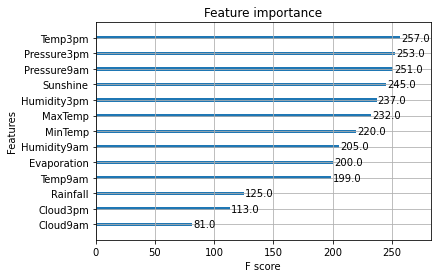

In [198]:
plot_importance(Xg_class)
plt.show()

In [199]:
y_XGbpred = Xg_class.predict(X_test)

In [200]:
accuracy_score(y_test, y_XGbpred)

0.844311377245509

In [201]:
Xg_class = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [202]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [203]:
grid_search = GridSearchCV(Xg_class, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [204]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=Non

In [205]:
cvXg_class = grid_search.best_estimator_

In [206]:
accuracy_score(y_test, cvXg_class.predict(X_test))

0.842814371257485

In [211]:
data = {'Model':['Decision_Tree', 'Bagging_Classifier', 'Random Forest Classifier', 'Grid Search','Gradient Boosting Classifier','AdaBoost-Adaptive boosting','XGboost'],
      'Acurracy_score': [accuracy_score(y_test, y_pred), accuracy_score(y_test,y_bagpred),  accuracy_score(y_test,y_RFpred), accuracy_score(y_test,y_cvRFpred ),  accuracy_score(y_test,y_grdbstNewpred ),accuracy_score(y_test, y_adabstpred),accuracy_score(y_test, y_XGbpred)]}

In [212]:
model_Score = pd.DataFrame(data)

In [213]:
model_Score

,Model,Acurracy_score
0,Decision_Tree,0.811377
1,Bagging_Classifier,0.826347
2,Random Forest Classifier,0.841317
3,Grid Search,0.829341
4,Gradient Boosting Classifier,0.844311
5,AdaBoost-Adaptive boosting,0.832335
6,XGboost,0.844311


In [217]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Decision Tree
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

# Bagging Classifier
precision_bagging = precision_score(y_test, y_bagpred)
recall_bagging = recall_score(y_test, y_bagpred)
f1_bagging = f1_score(y_test, y_bagpred)

# Random Forest Classifier
precision_rf = precision_score(y_test, y_RFpred)
recall_rf = recall_score(y_test, y_RFpred)
f1_rf = f1_score(y_test, y_RFpred)

# Grid Search
precision_gs = precision_score(y_test, y_cvRFpred)
recall_gs = recall_score(y_test, y_cvRFpred)
f1_gs = f1_score(y_test, y_cvRFpred)

# Gradient Boosting Classifier
precision_gb = precision_score(y_test, y_grdbstNewpred)
recall_gb = recall_score(y_test, y_grdbstNewpred)
f1_gb = f1_score(y_test, y_grdbstNewpred)

# AdaBoost
precision_adaboost = precision_score(y_test, y_adabstpred)
recall_adaboost = recall_score(y_test, y_adabstpred)
f1_adaboost = f1_score(y_test, y_adabstpred)

# XGBoost
precision_xgboost = precision_score(y_test, y_XGbpred)
recall_xgboost = recall_score(y_test, y_XGbpred)
f1_xgboost = f1_score(y_test, y_XGbpred)


results = pd.DataFrame({
    'Model': ['Decision Tree', 'Bagging', 'Random Forest', 'Grid Search', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
    'Precision': [precision_dt, precision_bagging, precision_rf, precision_gs, precision_gb, precision_adaboost, precision_xgboost],
    'Recall': [recall_dt, recall_bagging, recall_rf, recall_gs, recall_gb, recall_adaboost, recall_xgboost],
    'F1 Score': [f1_dt, f1_bagging, f1_rf, f1_gs, f1_gb, f1_adaboost, f1_xgboost]
})


In [218]:
results

,Model,Precision,Recall,F1 Score
0,Decision Tree,0.615942,0.537975,0.574324
1,Bagging,0.666667,0.531646,0.591549
2,Random Forest,0.736364,0.512658,0.604478
3,Grid Search,0.689655,0.506329,0.583942
4,Gradient Boosting,0.745455,0.518987,0.611940
5,AdaBoost,0.712963,0.487342,0.578947
6,XGBoost,0.736842,0.531646,0.617647


### Q1 - Answer
- The task is to create a machine learning model to predict rainfall accurately using historical weather data from 2008 to 2017.
- The problem involves using classification techniques, specifically decision tree classifiers and ensemble methods, to predict weather conditions.

###  Q2 - Answer
##### - Data Loading & Preprocessing :
- Loaded sydney rainfall xlxs data.
- Completed preprocessing tasks, including handling missing values (filling NaN with mean and mode) and converting           categorical data into numerical form.

##### - Classification Models : 
- Utilized different Classification and ensemble models for prediction.
- Evaluated model performance using metrics such as precision,recall,F1 scores and confussion matrix


### Q3 - Answer
 - Applied various multiple Classification and ensemble models for rainfall prediction.
 - Models include **Decision Tree, Bagging, Random Forest, Grid Search, Gradient Boosting, AdaBoost and XGBoost Model.**
 - Trained models on 80% of the data and evaluated performance on the remaining 20%.

### Q4 - Answer
- Based on the provided accuracy scores, the **Gradient Boosting Classifier** and **XGBoost Classifier** have the highest accuracy
- Their ability to handle non-linear patterns in weather data and optimized combination of decision trees make them well-suited for accurate rainfall prediction in Sydney.
- Ensemble methods often outperform individual models by reducing overfitting and capturing complex patterns in the data.
- Gradient Boosting sequentially adds decision trees to the model, with each tree correcting the errors of the previous one.


In [220]:
model_Score

,Model,Acurracy_score
0,Decision_Tree,0.811377
1,Bagging_Classifier,0.826347
2,Random Forest Classifier,0.841317
3,Grid Search,0.829341
4,Gradient Boosting Classifier,0.844311
5,AdaBoost-Adaptive boosting,0.832335
6,XGboost,0.844311


### Q5 - Answer
- Achieved an outstanding Accuracy score of 0.84, indicating excellent predictive performance.
- **Hyperparameter Tuning :** Experiment with different values for learning rate, tree depth, and the number of trees to find the combination that maximizes performance.
- **Handling Imbalanced Data :** consider techniques such as oversampling the minority class or undersampling the majority class to balance the distribution. 
- **Regularization Techniques:** XGBoost incorporates regularization techniques to control overfitting, making it more robust     and less prone to memorizing the training data.regularization, to prevent overfitting and enhance the models ability to generalize to unseen data.
